In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
fLL = '/Users/yuntse/data/slarchetto/monitoring/LArLevel_20231002.csv'

In [3]:
LL = pd.read_csv(fLL, header = None, skiprows = 1, names = ['Time', 'Liquid_Level'])

In [4]:
LL['Time'] = LL['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))

In [5]:
LL_trim = LL[(LL.Liquid_Level<1.)&(LL.Liquid_Level>0.)]

In [6]:
LL_trim[(LL_trim.Liquid_Level>0.71)&(LL_trim.Liquid_Level<0.713)]

,Time,Liquid_Level
368,2023-10-02 11:51:27.540,0.712932
396,2023-10-02 11:56:07.550,0.710343
440,2023-10-02 12:06:07.573,0.710142
507,2023-10-02 12:17:37.599,0.710425
514,2023-10-02 12:18:47.602,0.710033
516,2023-10-02 12:19:07.602,0.710924
518,2023-10-02 12:19:27.603,0.711801
520,2023-10-02 12:19:47.604,0.711581
523,2023-10-02 12:20:17.605,0.712552
533,2023-10-02 12:21:57.609,0.710907


In [7]:
LL_trim[LL_trim.Time=='2023-10-02 12:20:17.605']

,Time,Liquid_Level
523,2023-10-02 12:20:17.605,0.712552


In [8]:
LL_trim[(LL_trim.Time>'2023-10-02 11:49:17.605')&(LL_trim.Time<'2023-10-02 12:10:17.605')]

,Time,Liquid_Level
356,2023-10-02 11:49:27.536,0.698006
357,2023-10-02 11:49:37.536,0.697425
358,2023-10-02 11:49:47.537,0.693959
359,2023-10-02 11:49:57.537,0.699536
360,2023-10-02 11:50:07.537,0.696913
...,...,...
460,2023-10-02 12:09:37.581,0.703175
461,2023-10-02 12:09:47.582,0.704679
462,2023-10-02 12:09:57.582,0.693252
463,2023-10-02 12:10:07.582,0.699615


In [9]:
tRTD3 = datetime.strptime('2023-10-02 12:20:17.605', '%Y-%m-%d %H:%M:%S.%f')
tRTD3

datetime.datetime(2023, 10, 2, 12, 20, 17, 605000)

In [10]:
stopFirst = datetime.strptime('2023-10-02 11:49:57.537', '%Y-%m-%d %H:%M:%S.%f')
startSecond = datetime.strptime('2023-10-02 12:10:07.582', '%Y-%m-%d %H:%M:%S.%f')

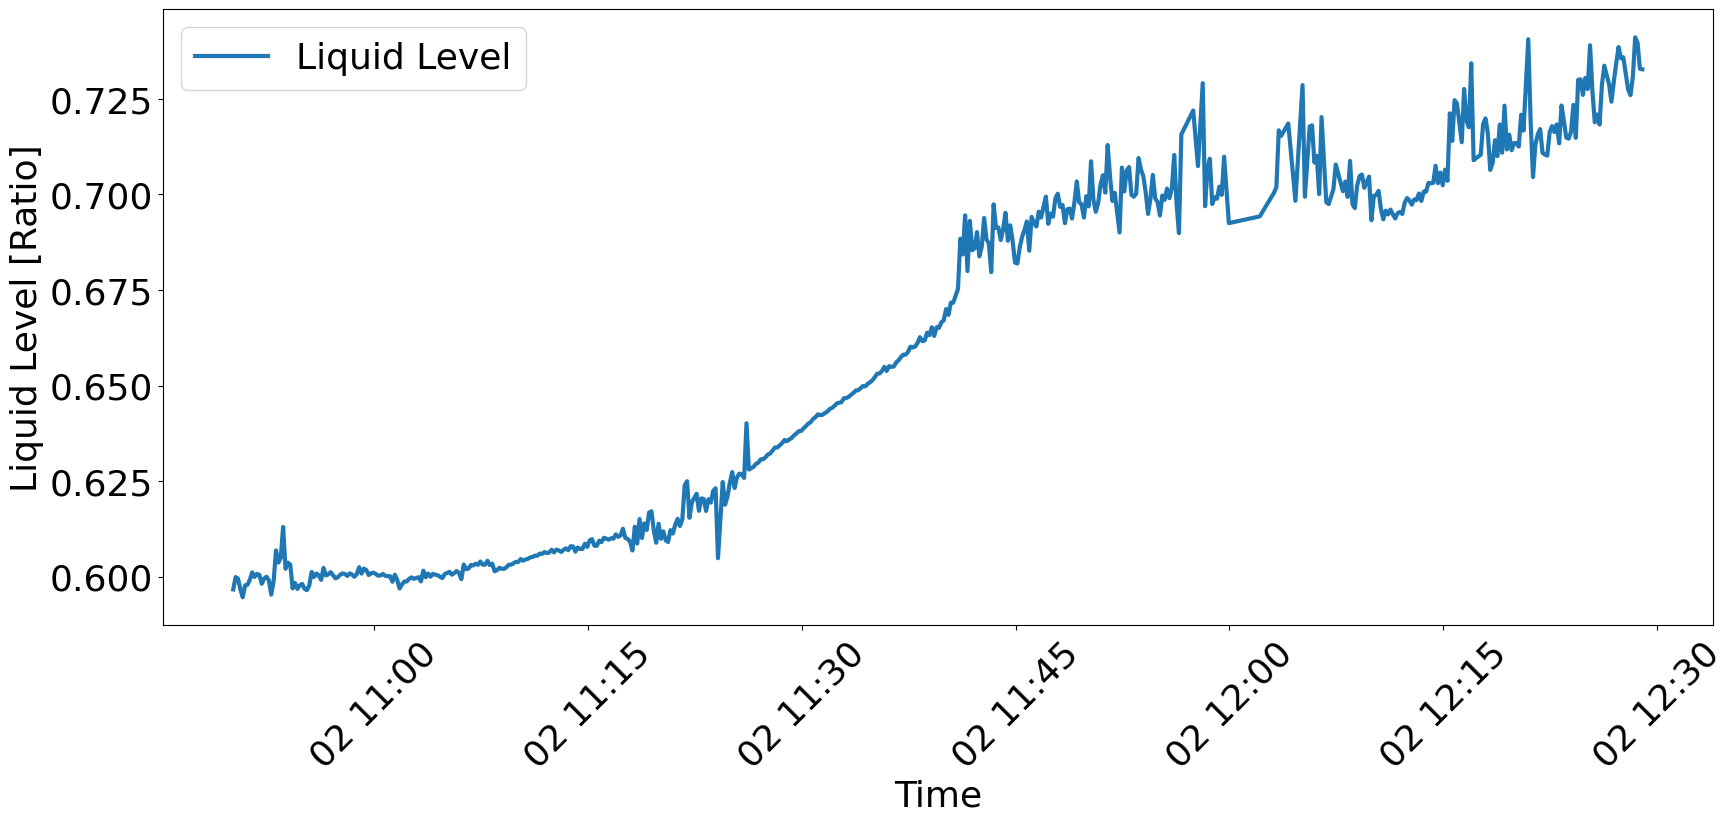

In [11]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
ax.plot( LL_trim['Time'], LL_trim['Liquid_Level'], label = 'Liquid Level', lw = 3)
# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [Ratio]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
ax.legend(loc = 'upper left', ncol = 1, fontsize = 26)

In [12]:
# Change the dataframe to series
LLSeries = LL_trim['Liquid_Level'].squeeze()
print( LLSeries )
print( type(LLSeries) )

0      0.596636
1      0.599865
2      0.599485
3      0.596669
4      0.594572
         ...   
571    0.730717
572    0.741134
573    0.739697
574    0.732879
575    0.732764
Name: Liquid_Level, Length: 552, dtype: float64
<class 'pandas.core.series.Series'>


In [13]:
# Number of samples to take the average
windowSize = 10

# Get the window of series
# of observations of specified window size
LLWindow = LLSeries.rolling( windowSize )
  
# Create a series of moving
# averages of each window
LLAveS = LLWindow.mean()
# std of each window
LLStdS = LLWindow.std()

In [14]:
LLAveS = LLAveS[9:]
LLStdS = LLStdS[9:]
LLAveS

9      0.598297
10     0.598704
11     0.598762
12     0.598625
13     0.598906
         ...   
571    0.731137
572    0.732364
573    0.733906
574    0.734237
575    0.734087
Name: Liquid_Level, Length: 543, dtype: float64

In [15]:
LLShift = LL_trim.shift(periods = 5)
LLTime = LLShift['Time']
LLShift

,Time,Liquid_Level
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
...,...,...
571,2023-10-02 12:27:17.621,0.738587
572,2023-10-02 12:27:27.621,0.735651
573,2023-10-02 12:27:37.622,0.735905
574,2023-10-02 12:27:57.623,0.727545


In [16]:
# Convert the series to data frame
LLAve = LLAveS.to_frame()
LLStd = LLStdS.to_frame()
# Insert the time stamp and the std to the current average data frame
LLAve.insert( 1, 'Time', LLTime )
LLAve.insert( 2, 'Std', LLStd )
# Add a column of std/average in %
LLAve = LLAve.assign( Variation = lambda x: x.Std/-x.Liquid_Level*100. )
# Remove the NaN rows
LLAve = LLAve.dropna()
print( LLAve )

     Liquid_Level                    Time       Std  Variation
9        0.598297 2023-10-02 10:50:47.405  0.001971  -0.329454
10       0.598704 2023-10-02 10:50:57.405  0.002010  -0.335784
11       0.598762 2023-10-02 10:51:07.406  0.002055  -0.343202
12       0.598625 2023-10-02 10:51:17.406  0.002047  -0.341943
13       0.598906 2023-10-02 10:51:27.407  0.001939  -0.323692
..            ...                     ...       ...        ...
571      0.731137 2023-10-02 12:27:17.621  0.004744  -0.648840
572      0.732364 2023-10-02 12:27:27.621  0.005600  -0.764713
573      0.733906 2023-10-02 12:27:37.622  0.005238  -0.713702
574      0.734237 2023-10-02 12:27:57.623  0.005033  -0.685538
575      0.734087 2023-10-02 12:28:07.623  0.005055  -0.688596

[543 rows x 4 columns]


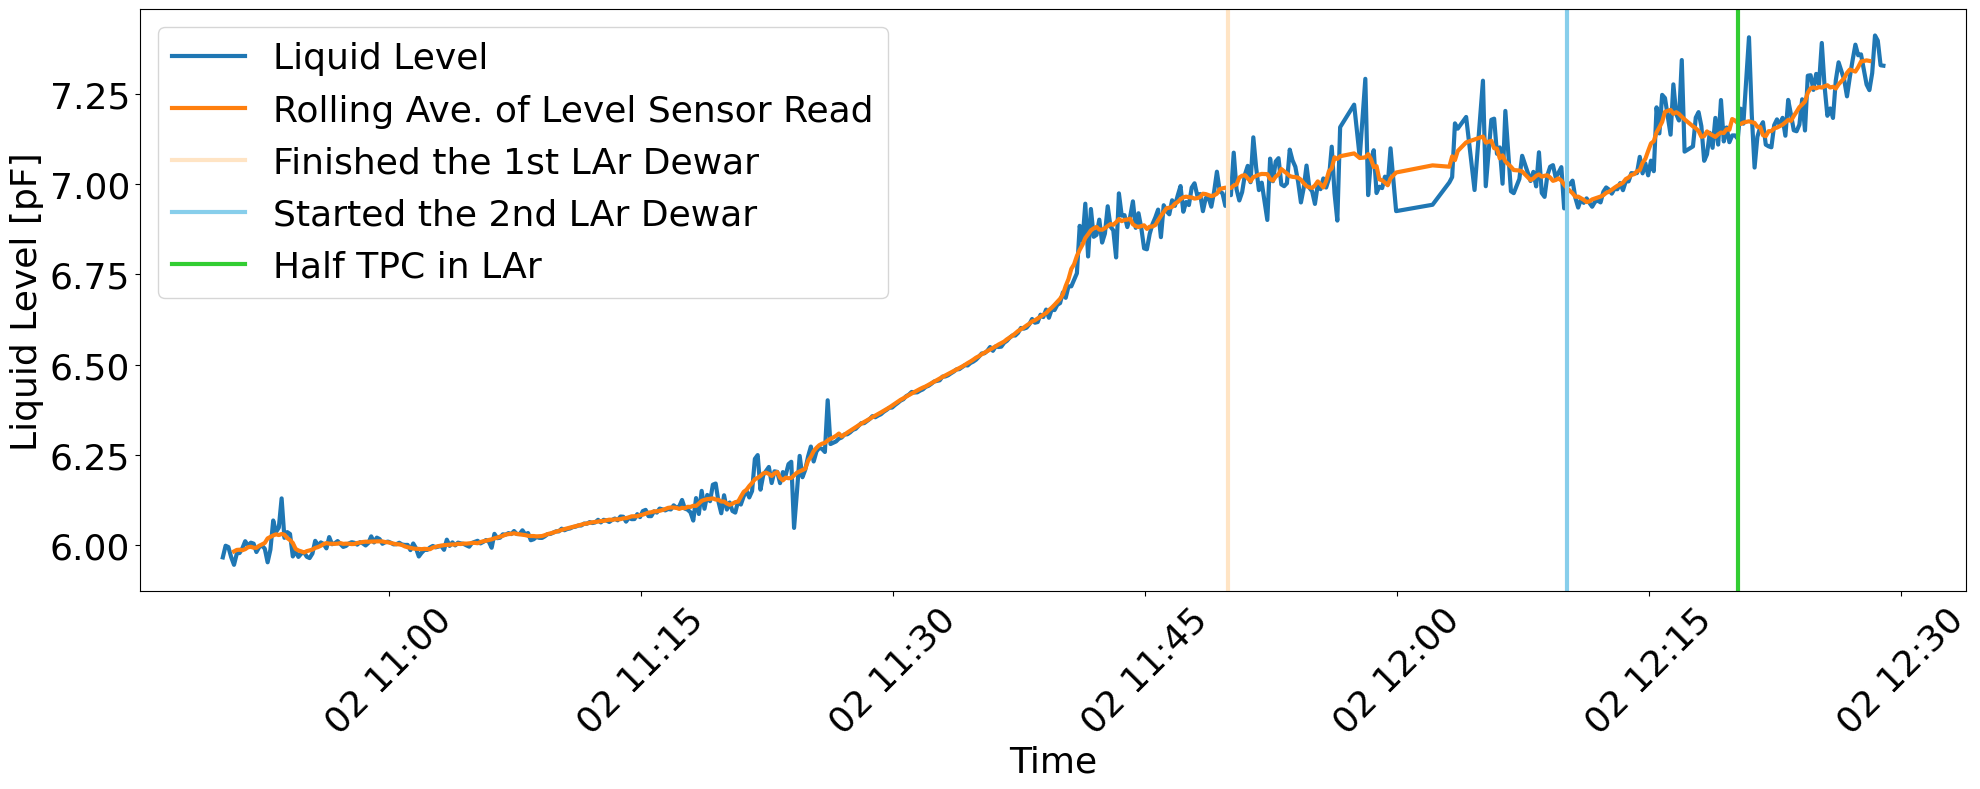

In [17]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
ax.plot( LL_trim['Time'], LL_trim['Liquid_Level']*10, label = 'Liquid Level', lw = 3)
ax.plot( LLAve['Time'], LLAve['Liquid_Level']*10, label = 'Rolling Ave. of Level Sensor Read', lw = 3)
plt.axvline( x = stopFirst, lw = 3, color = 'bisque', label = 'Finished the 1st LAr Dewar')
plt.axvline( x = startSecond, lw = 3, color = 'skyblue', label = 'Started the 2nd LAr Dewar')
plt.axvline( x = tRTD3, lw = 3, color = 'limegreen', label = 'Half TPC in LAr')

# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [pF]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
ax.legend(loc = 'upper left', ncol = 1, fontsize = 26)
plt.tight_layout()
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevel_20231002.pdf')
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevel_20231002.png')

In [18]:
fLL2 = '/Users/yuntse/data/slarchetto/monitoring/LArLevel_20231009.csv'

In [19]:
LL2 = pd.read_csv(fLL2, header = None, skiprows = 1, names = ['Time', 'Liquid_Level'])

In [20]:
LL2['Time'] = LL2['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))

In [21]:
LL2_trim = LL2[(LL2.Liquid_Level<0.85)&(LL2.Liquid_Level>0.6)]

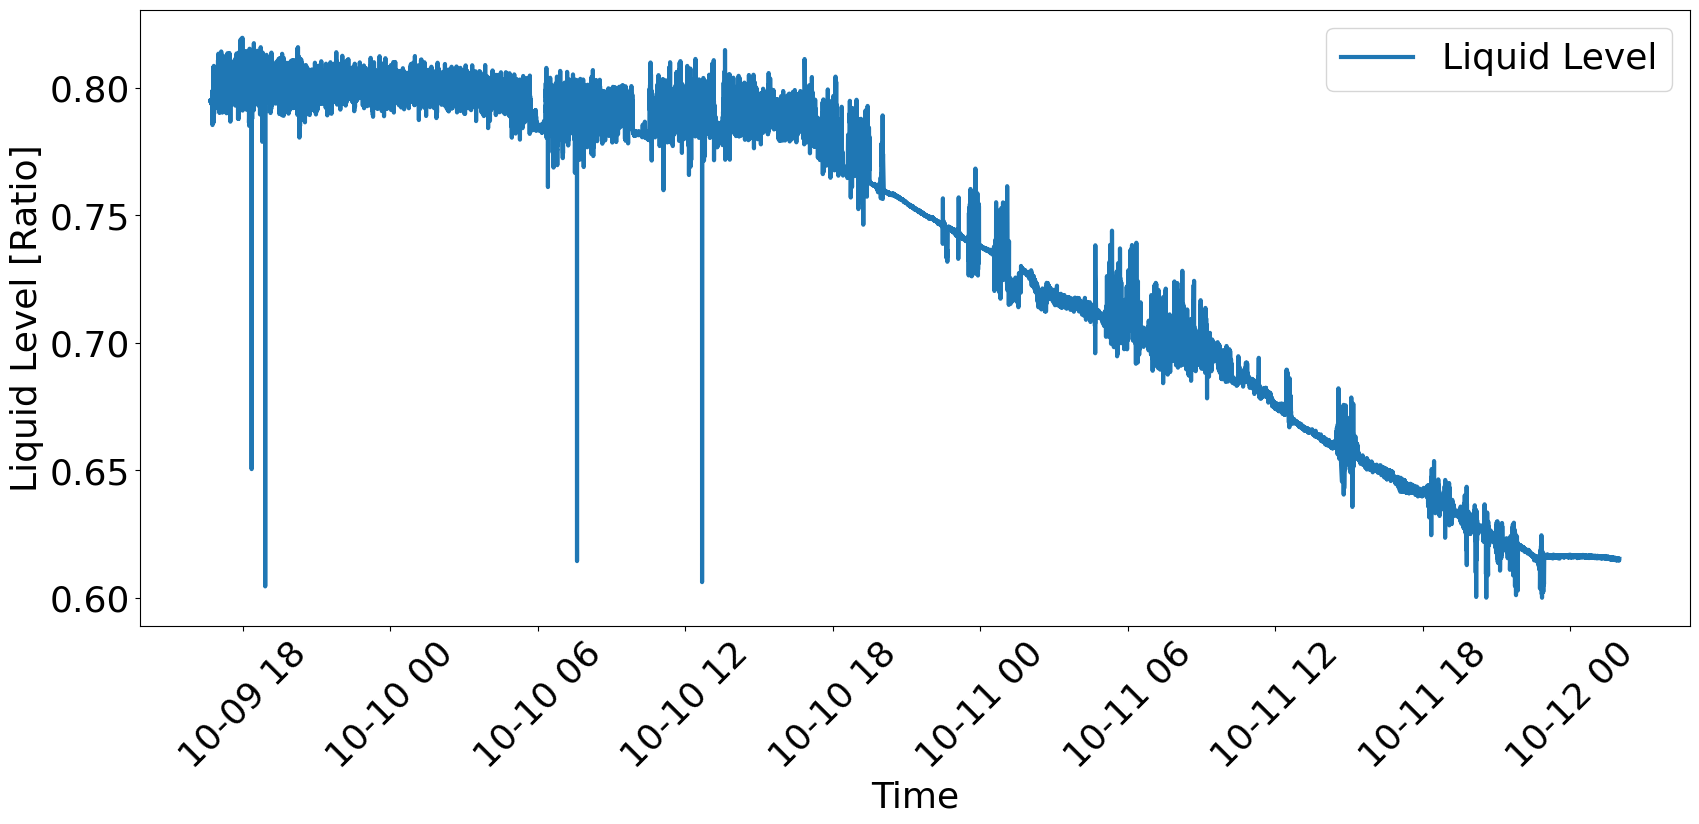

In [22]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
ax.plot( LL2_trim['Time'], LL2_trim['Liquid_Level'], label = 'Liquid Level', lw = 3)
# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [Ratio]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
ax.legend(loc = 'upper right', ncol = 1, fontsize = 26)

In [23]:
# Change the dataframe to series
LL2Series = LL2_trim['Liquid_Level'].squeeze()
print( LL2Series )
print( type(LL2Series) )

0        0.794917
1        0.795167
2        0.794960
3        0.795178
4        0.795104
           ...   
20226    0.615063
20227    0.614856
20228    0.614683
20229    0.615078
20230    0.615336
Name: Liquid_Level, Length: 19653, dtype: float64
<class 'pandas.core.series.Series'>


In [24]:
# Get the window of series
# of observations of specified window size
LL2Window = LL2Series.rolling( windowSize )
  
# Create a series of moving
# averages of each window
LL2AveS = LL2Window.mean()
# std of each window
LL2StdS = LL2Window.std()

In [25]:
LL2Shift = LL2_trim.shift(periods = 5)
LL2Time = LL2Shift['Time']
LL2Shift[0:20]

,Time,Liquid_Level
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
5,2023-10-09 16:40:56.879,0.794917
6,2023-10-09 16:41:06.879,0.795167
7,2023-10-09 16:41:16.882,0.794960
8,2023-10-09 16:41:26.882,0.795178
9,2023-10-09 16:41:36.883,0.795104


In [26]:
# Convert the series to data frame
LL2Ave = LL2AveS.to_frame()
LL2Std = LL2StdS.to_frame()
# Insert the time stamp and the std to the current average data frame
LL2Ave.insert( 1, 'Time', LL2Time )
LL2Ave.insert( 2, 'Std', LL2Std )
# Add a column of std/average in %
LL2Ave = LL2Ave.assign( Variation = lambda x: x.Std/-x.Liquid_Level*100. )
# Remove the NaN rows
LL2Ave = LL2Ave.dropna()
print( LL2Ave )

       Liquid_Level                    Time       Std  Variation
9          0.795127 2023-10-09 16:41:36.883  0.000122  -0.015369
10         0.795135 2023-10-09 16:41:46.888  0.000108  -0.013611
11         0.795136 2023-10-09 16:41:56.891  0.000109  -0.013661
12         0.795108 2023-10-09 16:42:06.892  0.000175  -0.022048
13         0.795023 2023-10-09 16:42:16.894  0.000301  -0.037834
...             ...                     ...       ...        ...
20226      0.615043 2023-10-12 01:58:34.306  0.000165  -0.026904
20227      0.615020 2023-10-12 01:58:44.306  0.000175  -0.028392
20228      0.614975 2023-10-12 01:58:54.307  0.000199  -0.032313
20229      0.615007 2023-10-12 01:59:04.307  0.000185  -0.030127
20230      0.615044 2023-10-12 01:59:14.307  0.000211  -0.034350

[19644 rows x 4 columns]


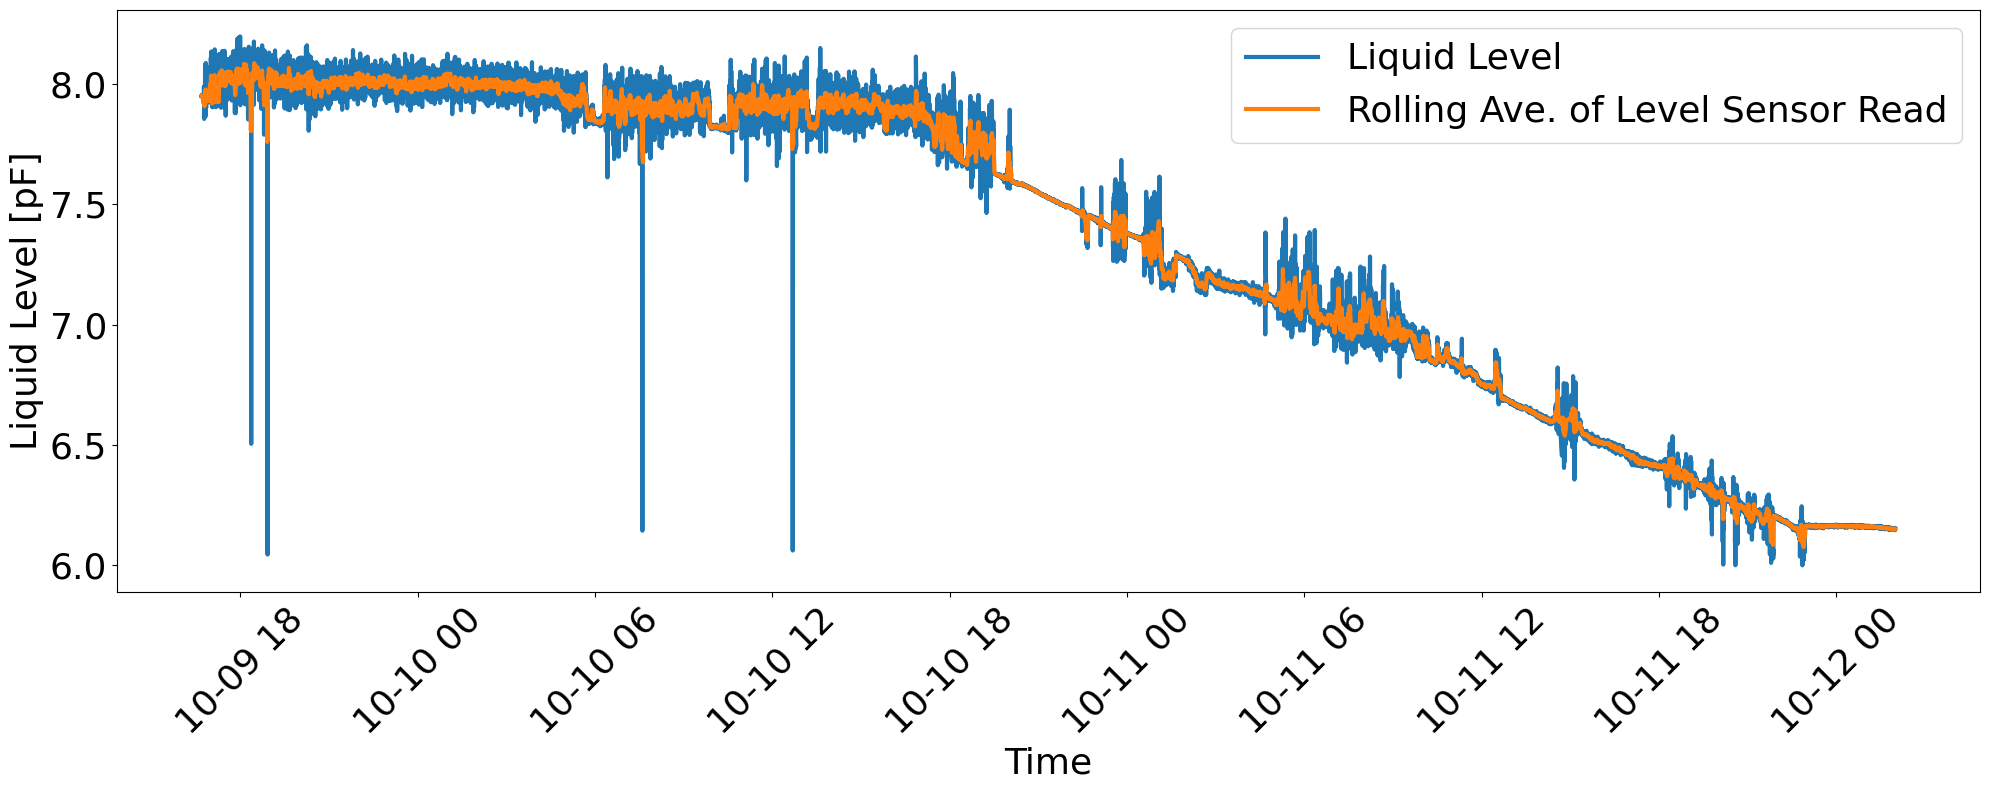

In [27]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
ax.plot( LL2_trim['Time'], LL2_trim['Liquid_Level']*10, label = 'Liquid Level', lw = 3)
ax.plot( LL2Ave['Time'], LL2Ave['Liquid_Level']*10, label = 'Rolling Ave. of Level Sensor Read', lw = 3)

# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [pF]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
ax.legend(loc = 'upper right', ncol = 1, fontsize = 26)
plt.tight_layout()
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevel_20231009.pdf')
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevel_20231009.png')

In [28]:
LLAve[LLAve.Time=='2023-10-02 12:20:17.605']

,Liquid_Level,Time,Std,Variation
529,0.716859,2023-10-02 12:20:17.605,0.009478,-1.322139


In [29]:
C = np.array([0.598297, 0.716859, 0.795127])
C = C*10
C

array([5.98297, 7.16859, 7.95127])

In [30]:
L = np.array([0., 40., 65.4])

In [31]:
f = np.polyfit(C, L, 1)
f

array([  33.26807003, -198.8834754 ])

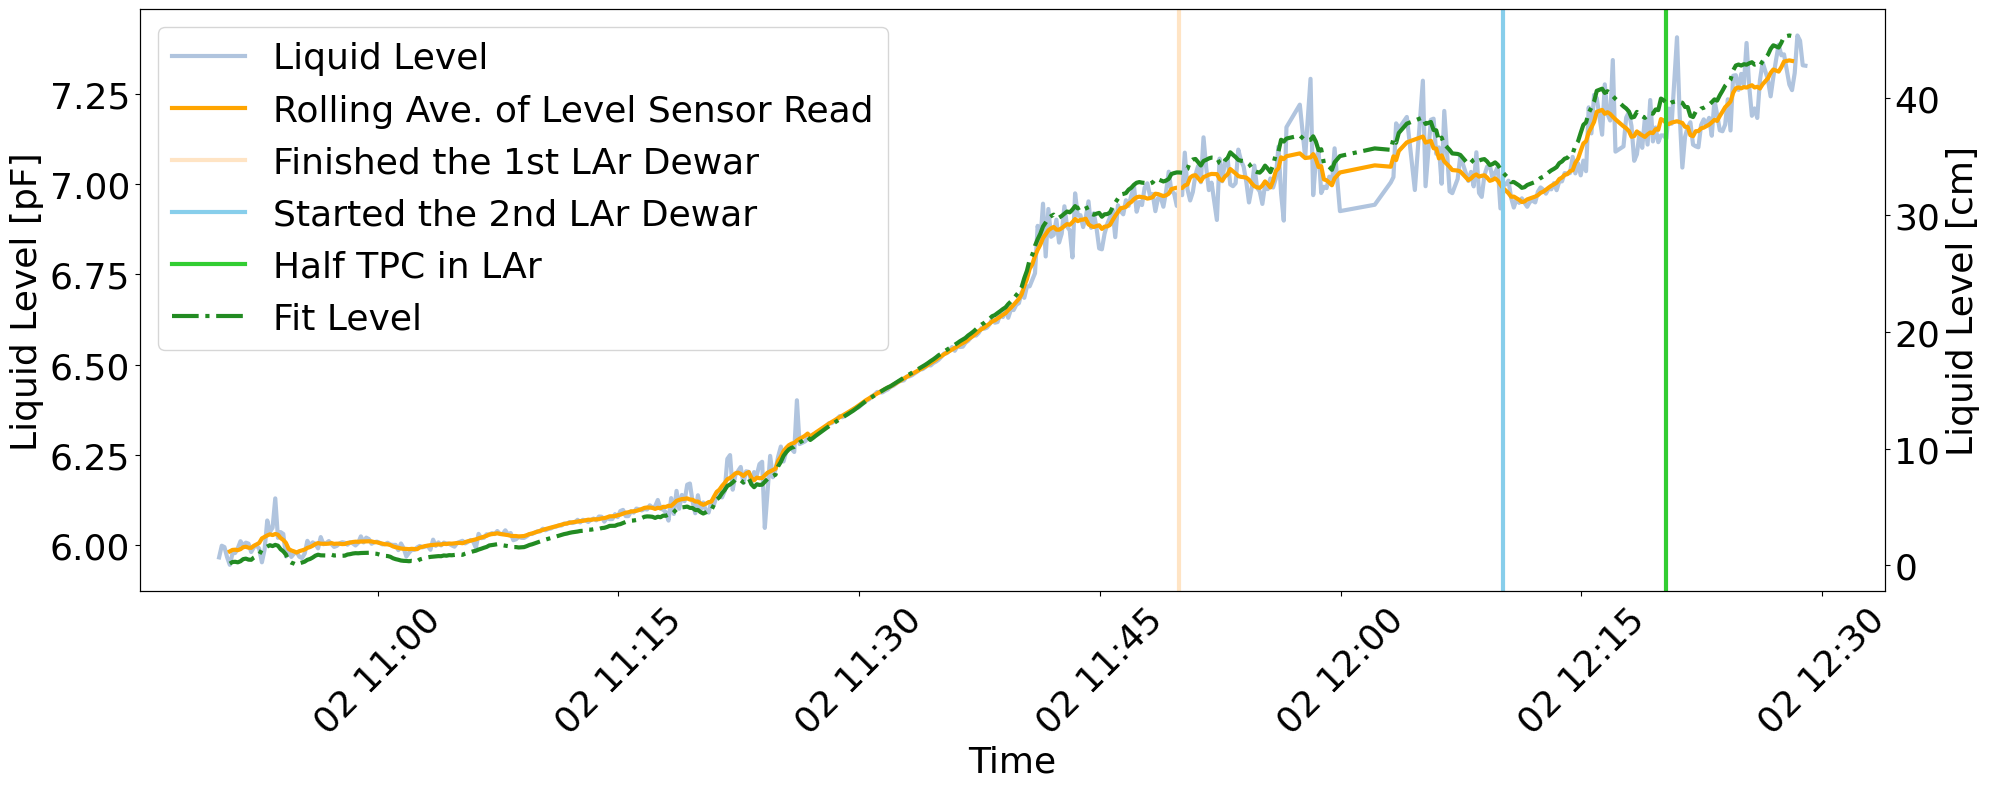

In [32]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
p1, = ax.plot( LL_trim['Time'], LL_trim['Liquid_Level']*10, label = 'Liquid Level', color = 'lightsteelblue', lw = 3)
p2, = ax.plot( LLAve['Time'], LLAve['Liquid_Level']*10, label = 'Rolling Ave. of Level Sensor Read', color = 'orange', lw = 3)
p3 = plt.axvline( x = stopFirst, lw = 3, color = 'bisque', label = 'Finished the 1st LAr Dewar')
p4 = plt.axvline( x = startSecond, lw = 3, color = 'skyblue', label = 'Started the 2nd LAr Dewar')
p5 = plt.axvline( x = tRTD3, lw = 3, color = 'limegreen', label = 'Half TPC in LAr')

# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [pF]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)

ax2 = ax.twinx()
p6, = ax2.plot( LLAve['Time'], LLAve['Liquid_Level']*10*f[0]+f[1], color = 'forestgreen', label = 'Fit Level', lw = 3, linestyle = 'dashdot')
ax2.set_ylabel('Liquid Level [cm]', fontsize = 26)
ax2.tick_params(axis = 'y', labelsize = 26)

ax.legend(handles = [p1, p2, p3, p4, p5, p6], fontsize = 26)
plt.tight_layout()
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevelFit_20231002.pdf')
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevelFit_20231002.png')

In [33]:
# fit result without time shift
33.31548728*7.14103-198.9118516

38.99504253109839

In [34]:
# fit result with time shift
33.26807003*7.16859-198.8834754

39.601678736357684

In [35]:
f[0]*5.98297+f[1]

0.1583895267533535

In [36]:
f[0]*7.95127+f[1]

65.63993176101246

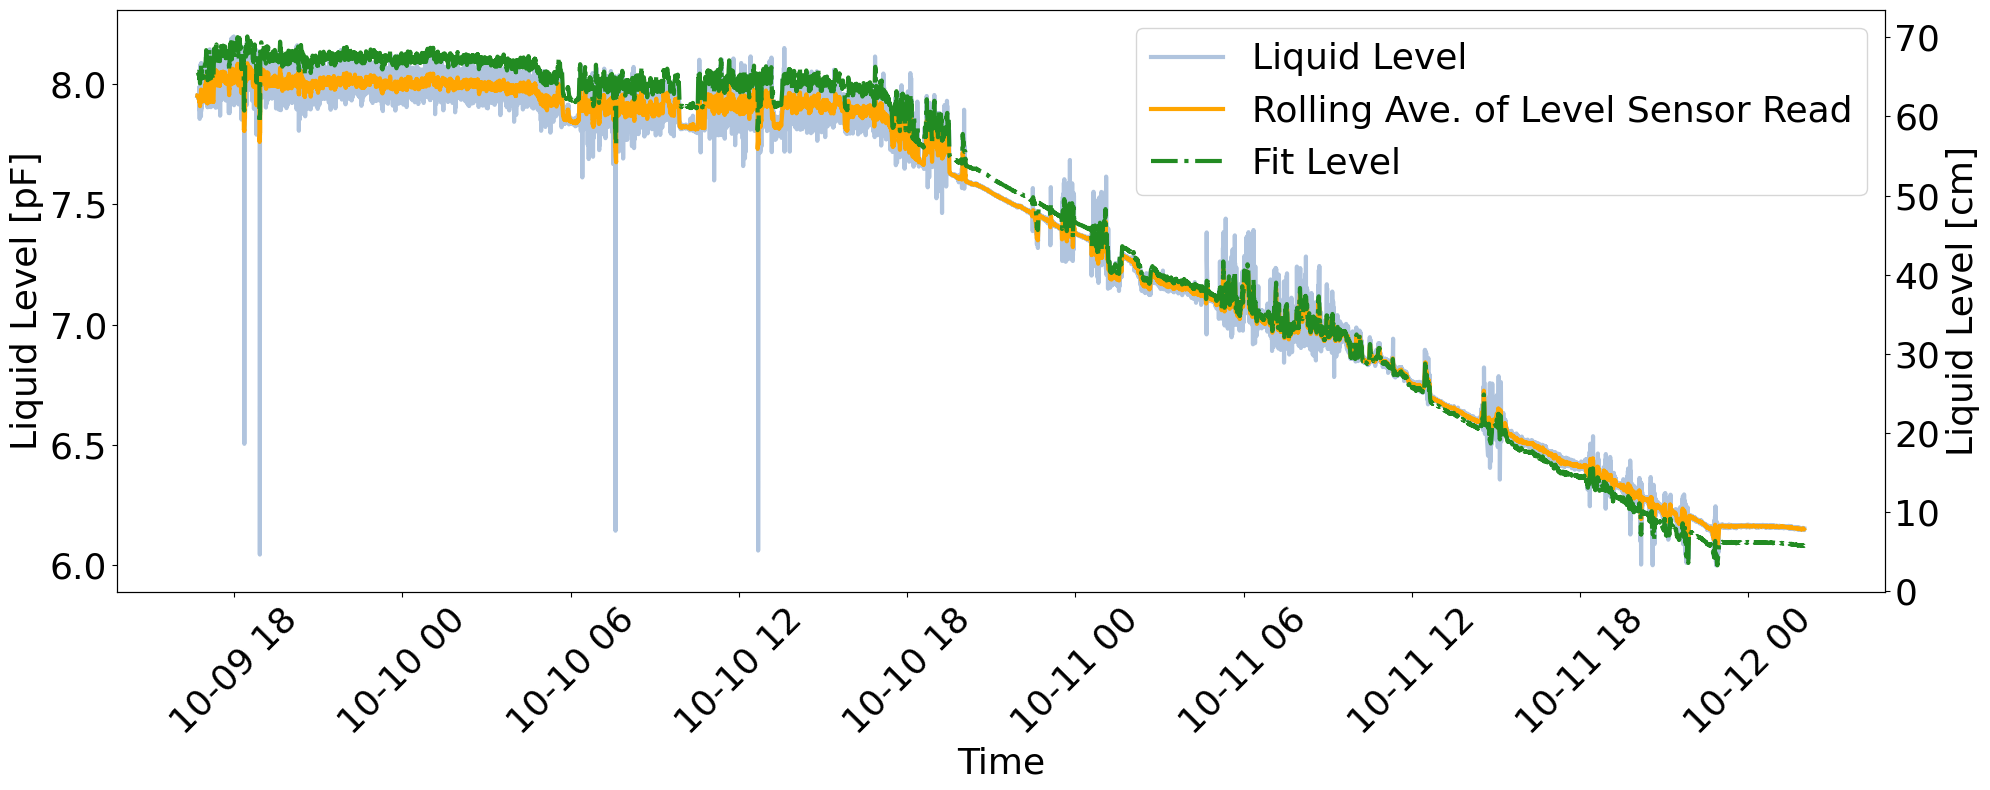

In [37]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
p1, = ax.plot( LL2_trim['Time'], LL2_trim['Liquid_Level']*10, label = 'Liquid Level', color = 'lightsteelblue', lw = 3)
p2, = ax.plot( LL2Ave['Time'], LL2Ave['Liquid_Level']*10, label = 'Rolling Ave. of Level Sensor Read', color = 'orange', lw = 3)

# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [pF]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)

ax2 = ax.twinx()
p6, = ax2.plot( LL2Ave['Time'], LL2Ave['Liquid_Level']*10*f[0]+f[1], color = 'forestgreen', label = 'Fit Level', lw = 3, linestyle = 'dashdot')
ax2.set_ylabel('Liquid Level [cm]', fontsize = 26)
ax2.tick_params(axis = 'y', labelsize = 26)

ax.legend(handles = [p1, p2, p6], fontsize = 26)
plt.tight_layout()
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevelFit_20231009.pdf')
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevelFit_20231009.png')